In [1]:
from CSR import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [8]:
def plot_2D_contour(x, y, z, title = None):
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    norm = colors.TwoSlopeNorm( vcenter=0)
    surf = ax.imshow(z, extent=(min(x), max(x), min(y), max(y)), origin='lower',  cmap='seismic',aspect='auto', norm = norm)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    

    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('x ($ \mu m$)')
    plt.ylabel('z ($ m$)')

    if title:
        plt.title(title)

    plt.show()
    plt.close()
    return ax

In [32]:
DtestCSR = CSR2D(input_file= 'input/dipole_config.yaml')
DtestCSR.CSR_params.compute_CSR = 0
DtestCSR.run(stop_time  =1.8)

Finish step 2 in 1.0318596363067627 seconds
Finish step 3 in 1.0468268394470215 seconds
Finish step 4 in 1.070950984954834 seconds
Finish step 5 in 1.1435916423797607 seconds
Finish step 6 in 1.161353349685669 seconds
Finish step 7 in 1.7720706462860107 seconds
Finish step 8 in 1.68951416015625 seconds
Finish step 9 in 1.5687856674194336 seconds
Finish step 10 in 2.0824778079986572 seconds
Finish step 11 in 4.046025991439819 seconds
Finish step 12 in 2.288585662841797 seconds
Finish step 13 in 2.76107120513916 seconds
Finish step 14 in 2.958786725997925 seconds
Finish step 15 in 2.7252979278564453 seconds
Finish step 16 in 2.5009193420410156 seconds
Finish step 17 in 3.108919382095337 seconds
Finish step 18 in 11.911344051361084 seconds
Finish step 19 in 2.4583096504211426 seconds
Finish step 20 in 2.609161853790283 seconds
Finish step 21 in 2.0875189304351807 seconds
Finish step 22 in 1.431997299194336 seconds
Finish step 23 in 1.257509469985962 seconds
Finish step 24 in 1.62358498573

In [33]:
tan_theta = DtestCSR.beam._slope[0]
tan_theta

-4.581896357685087

1.800000000000001


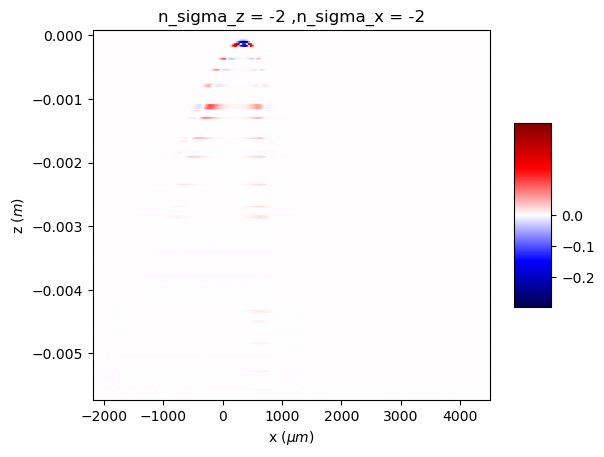

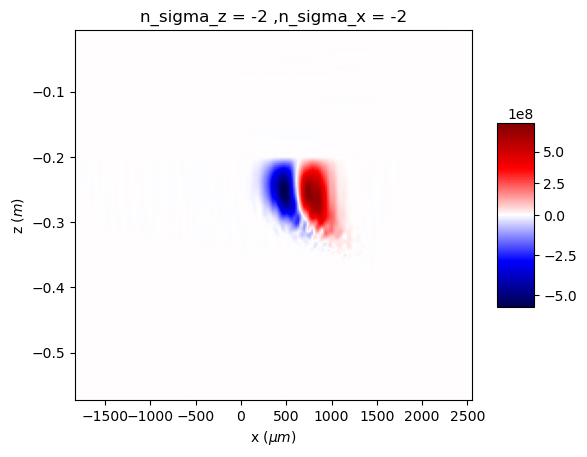

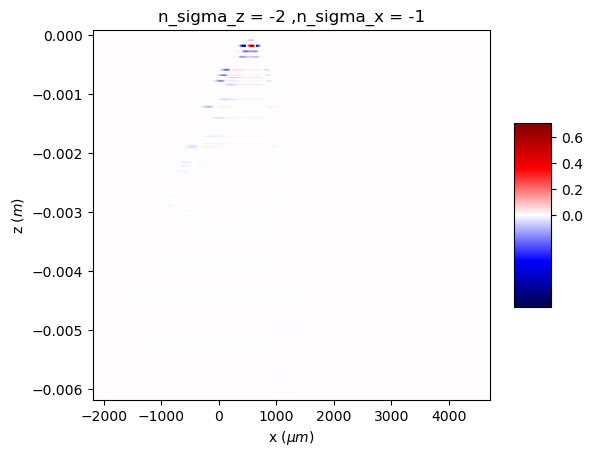

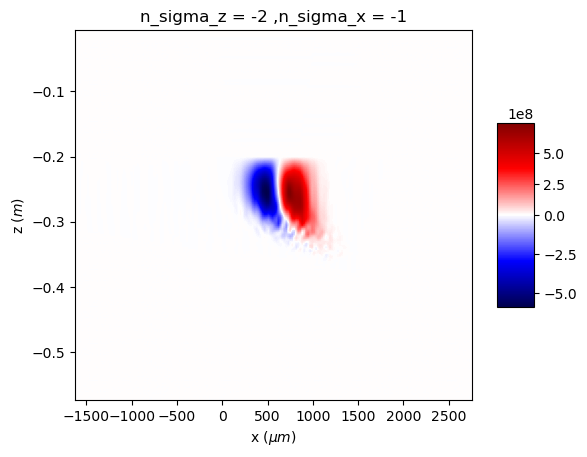

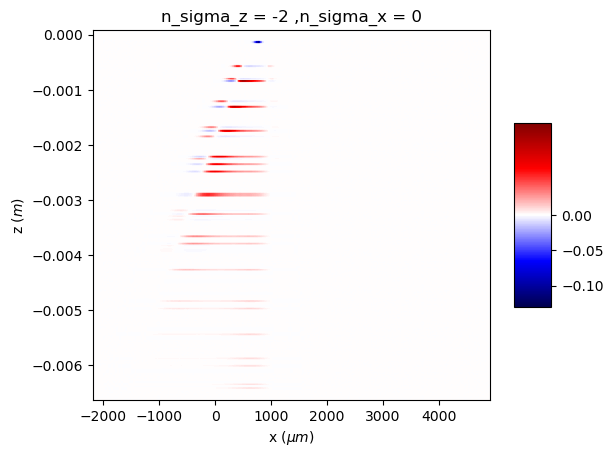

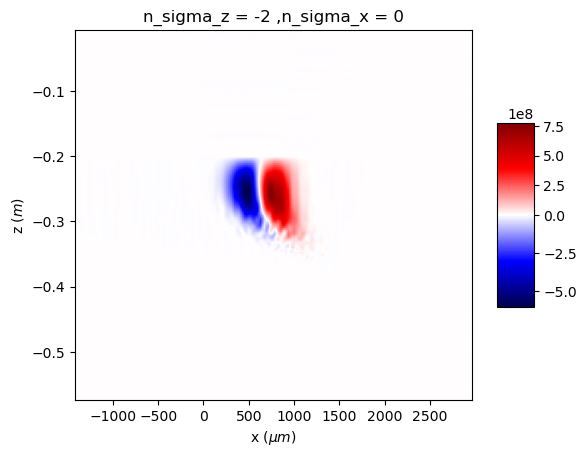

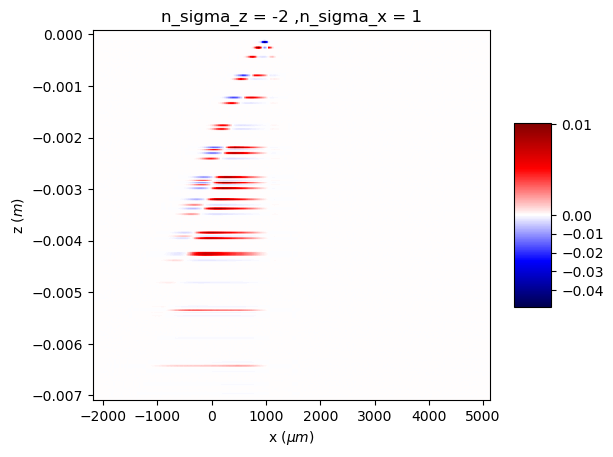

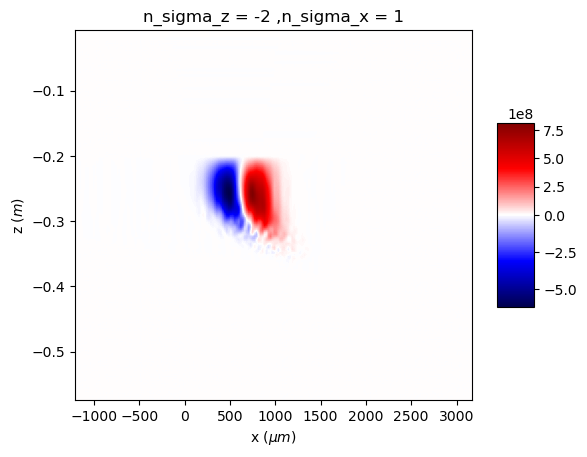

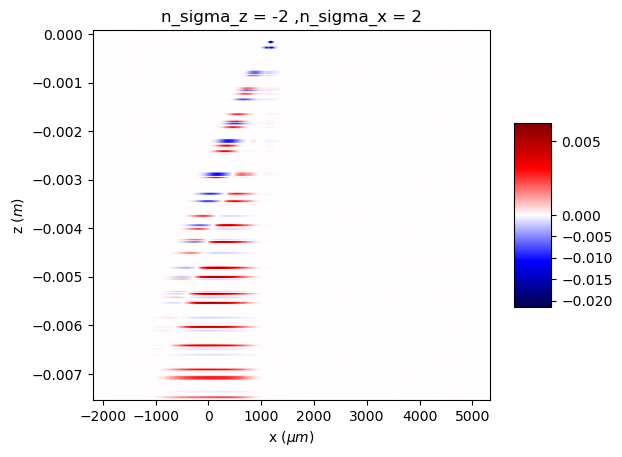

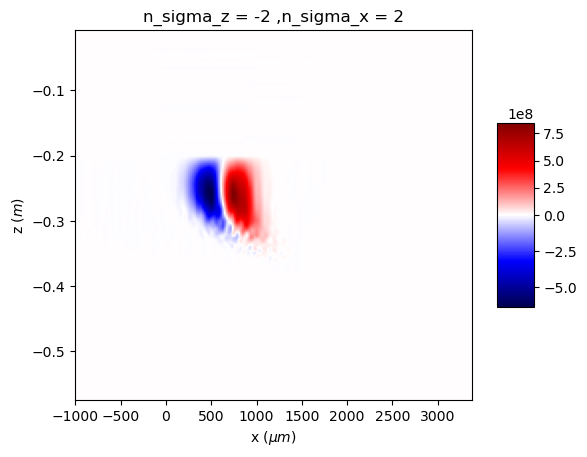

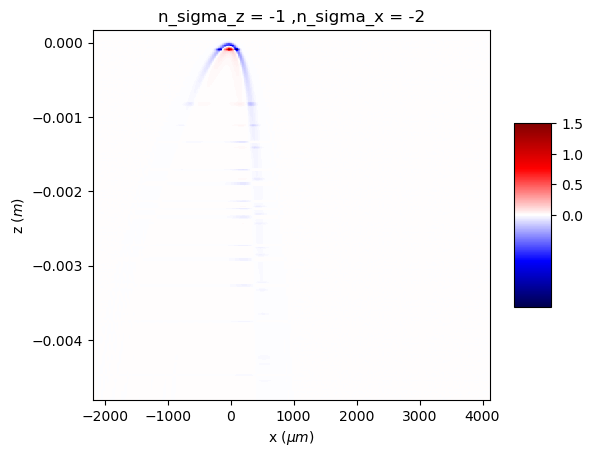

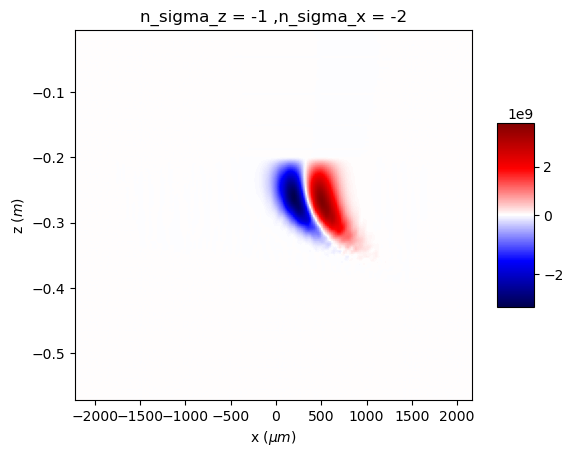

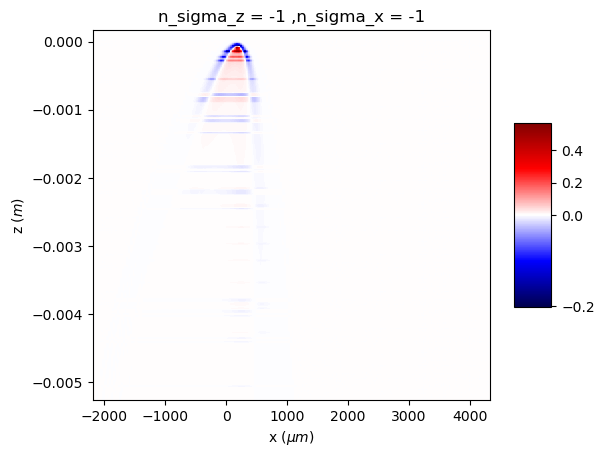

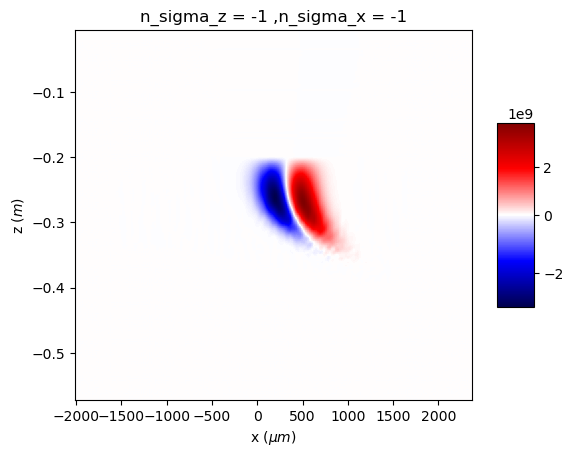

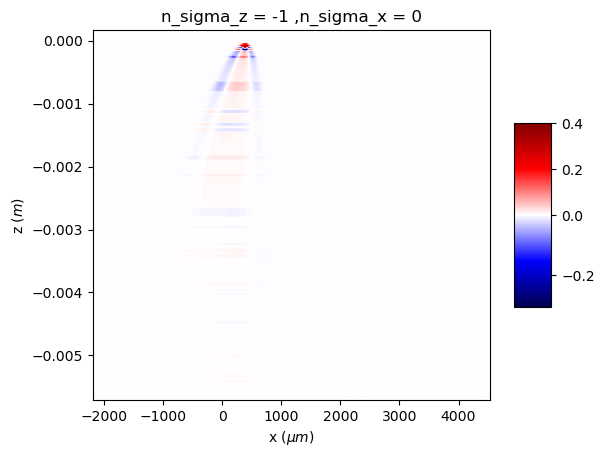

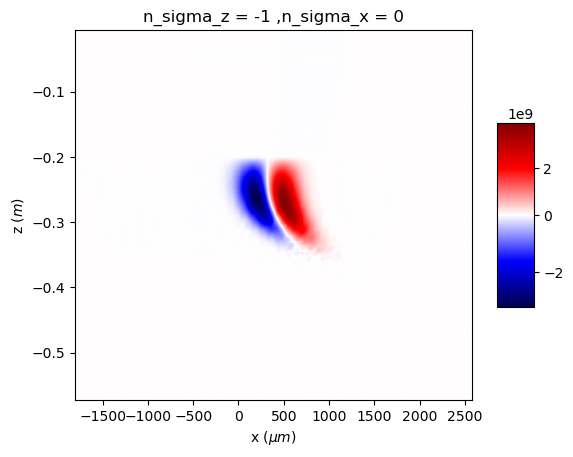

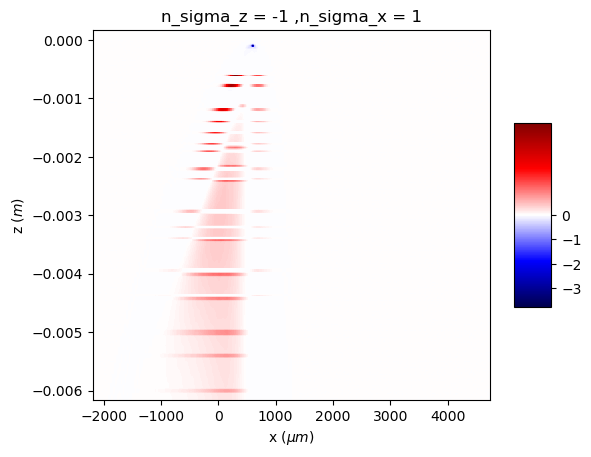

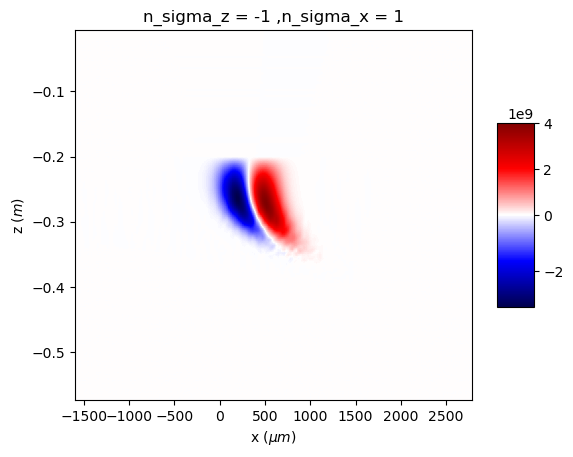

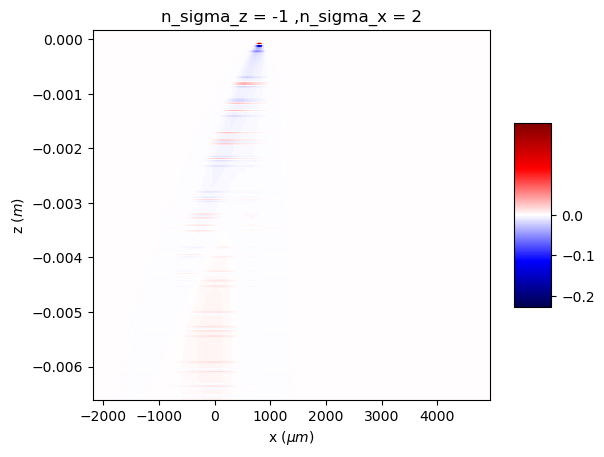

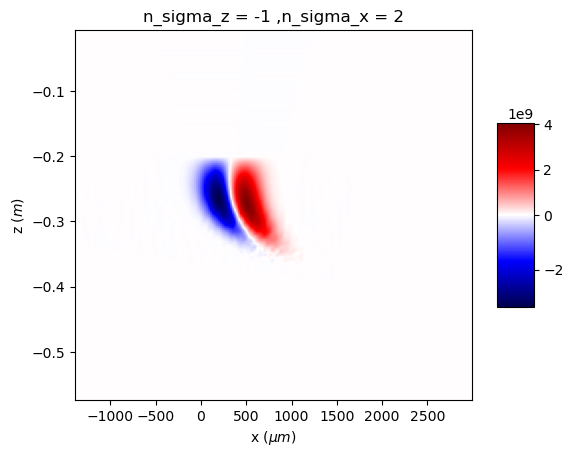

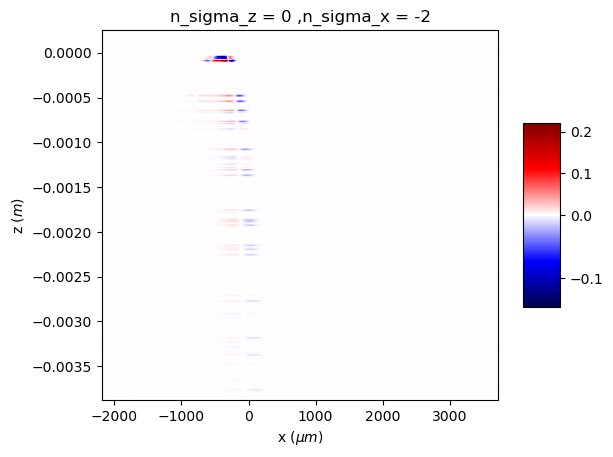

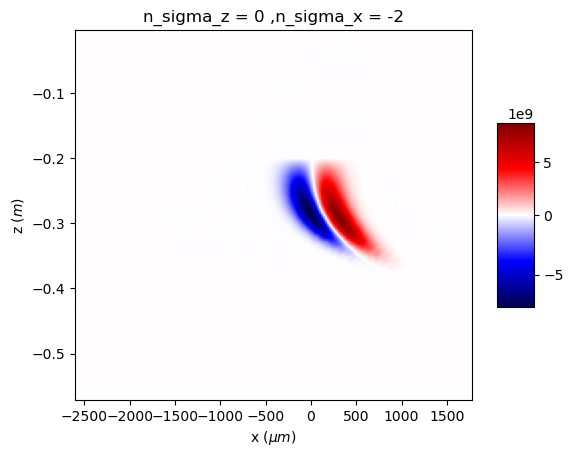

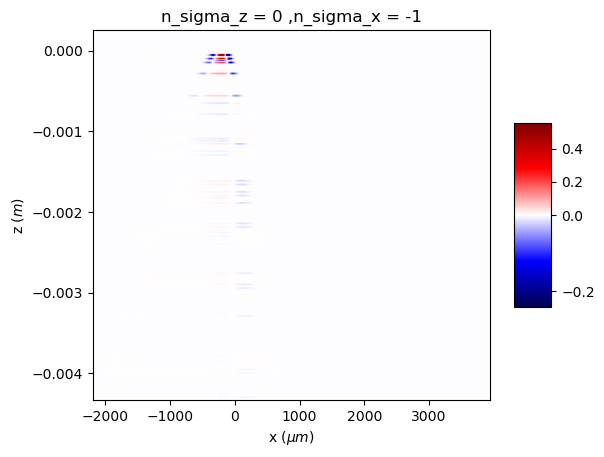

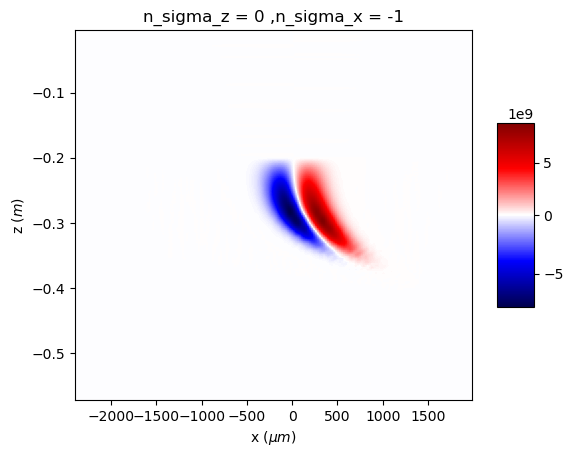

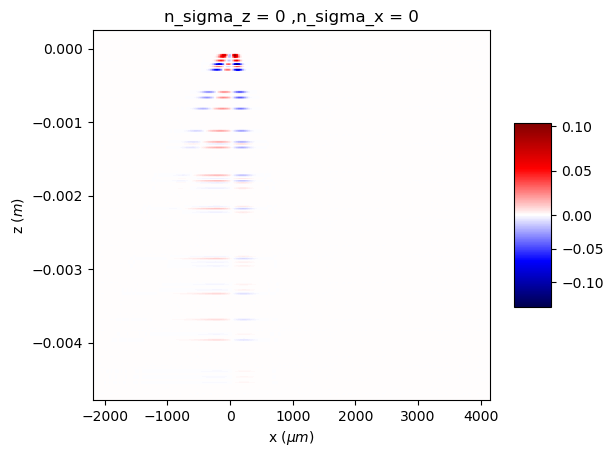

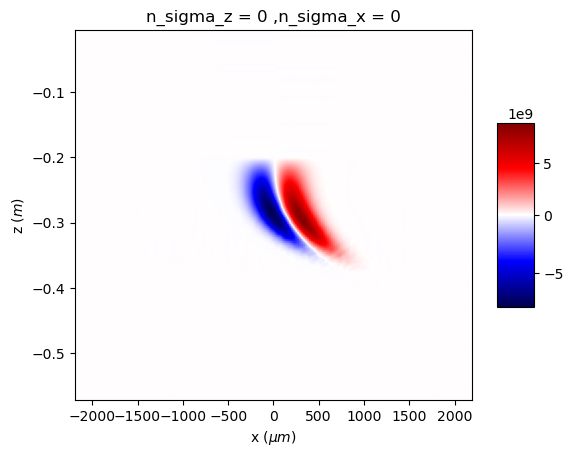

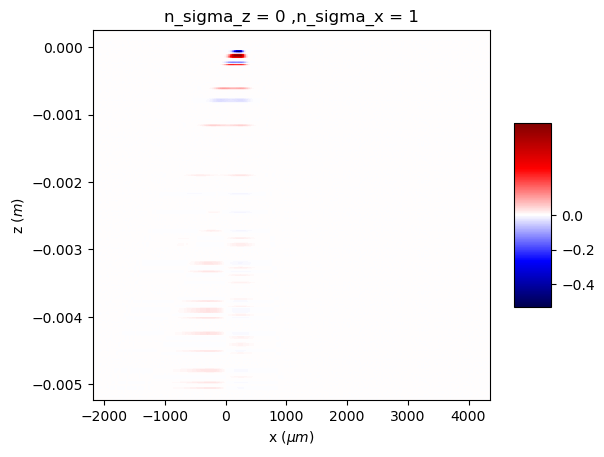

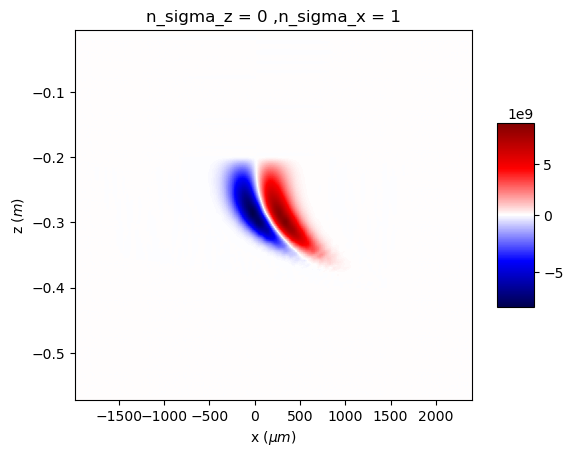

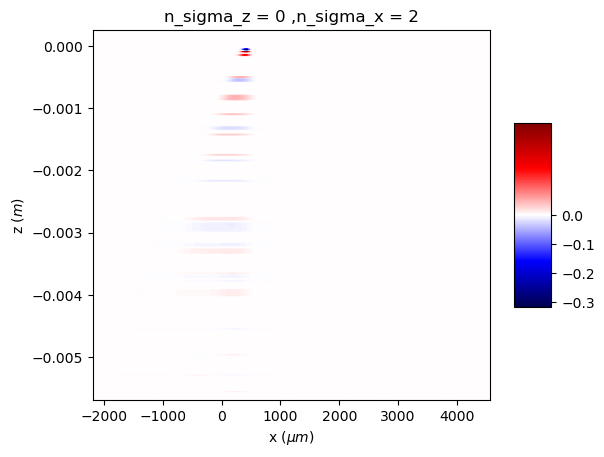

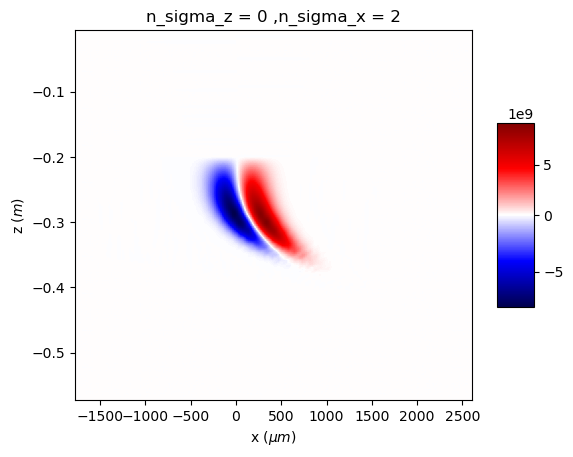

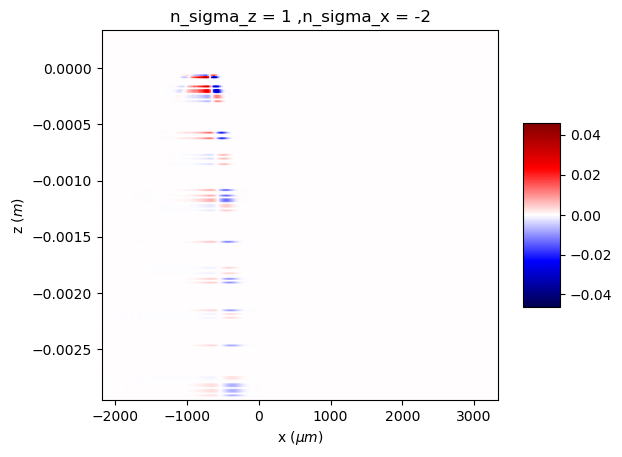

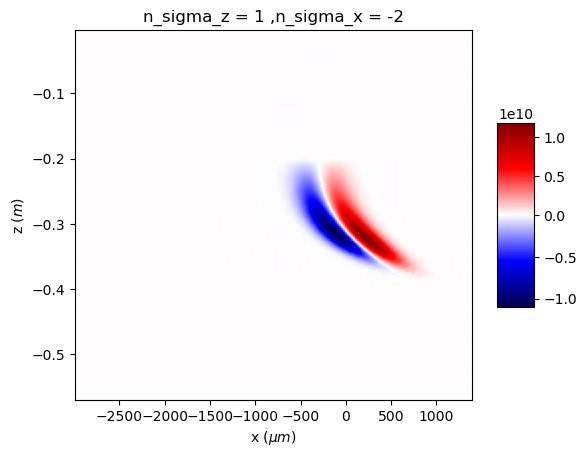

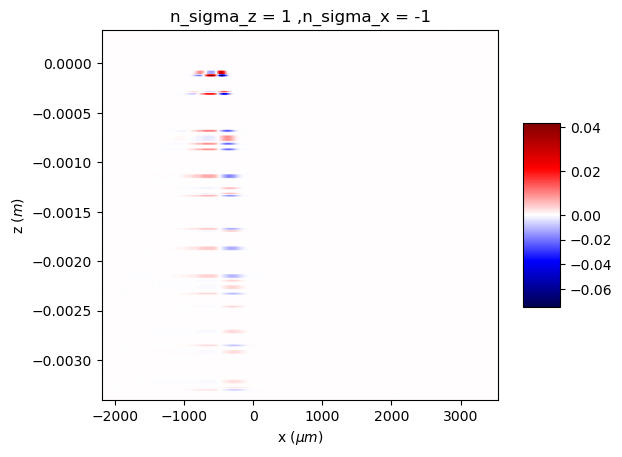

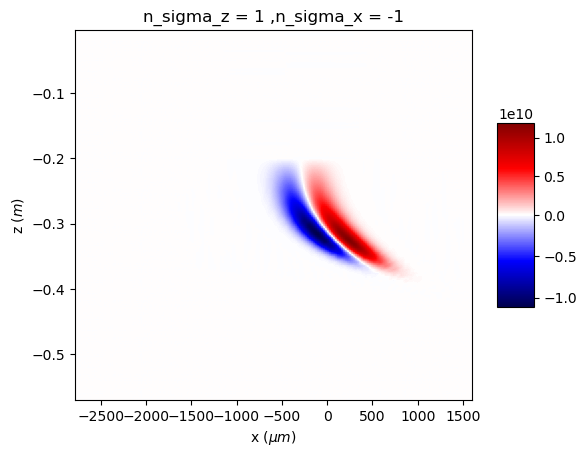

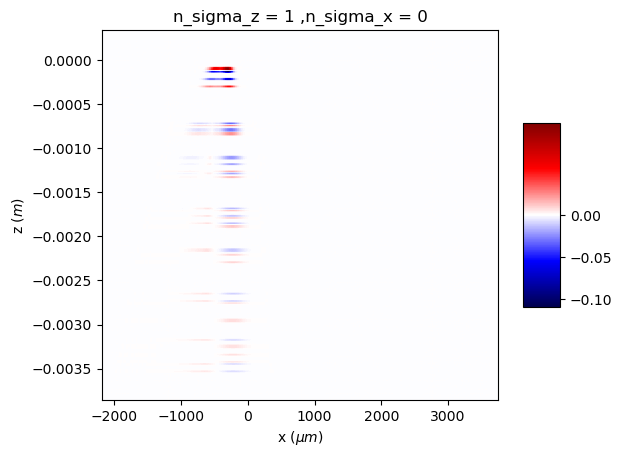

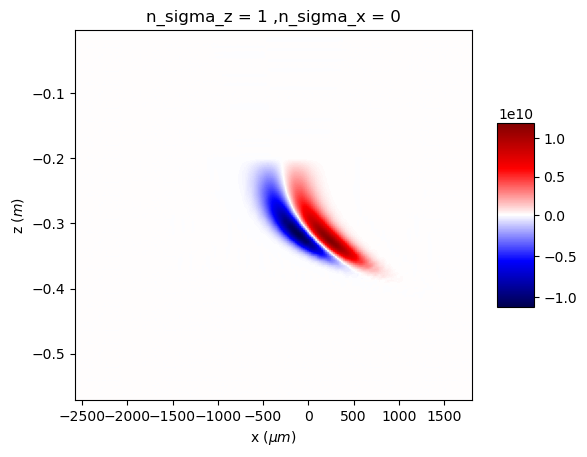

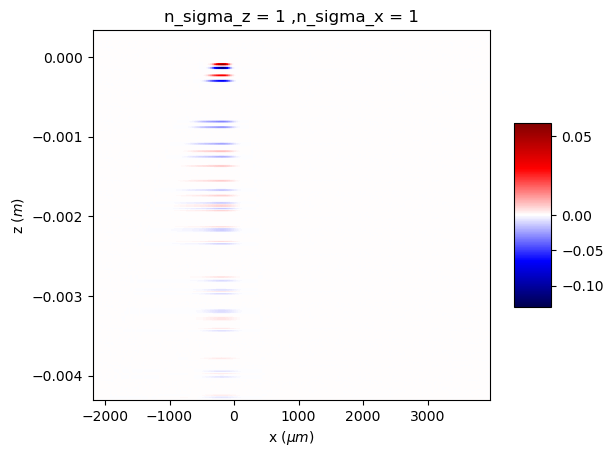

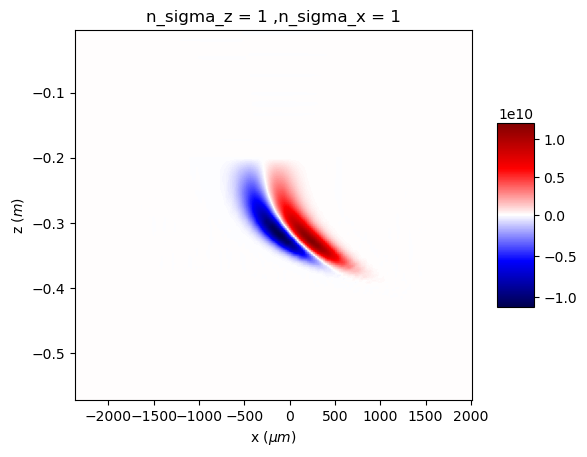

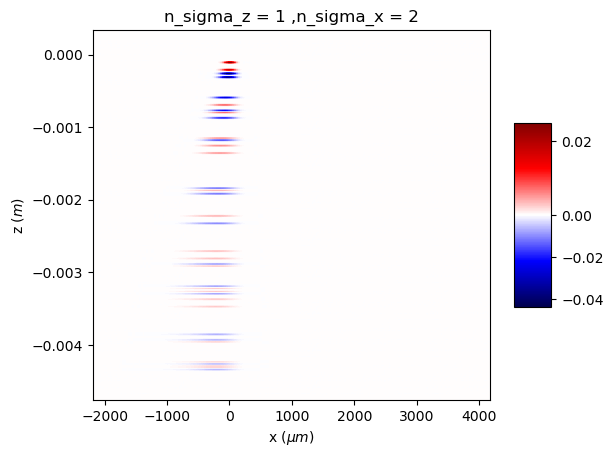

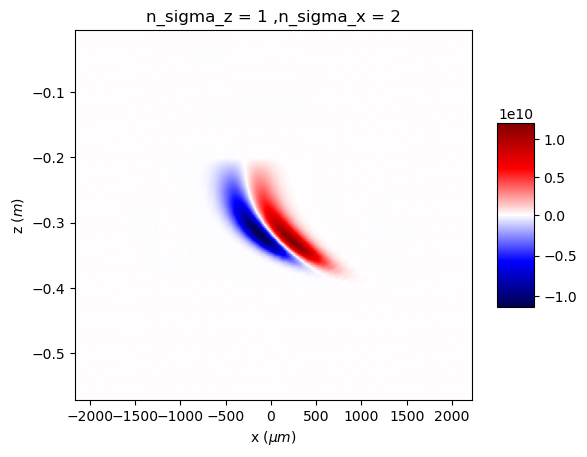

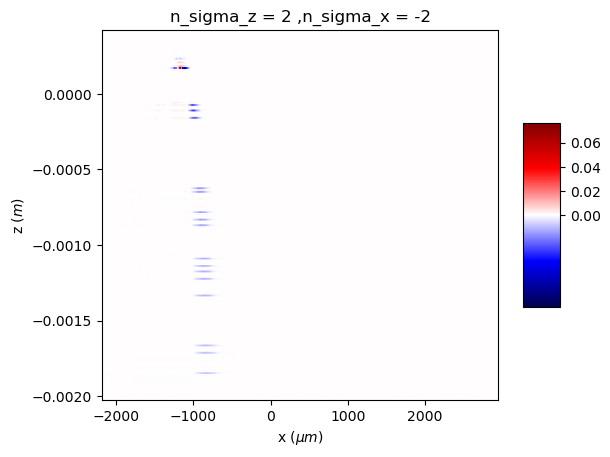

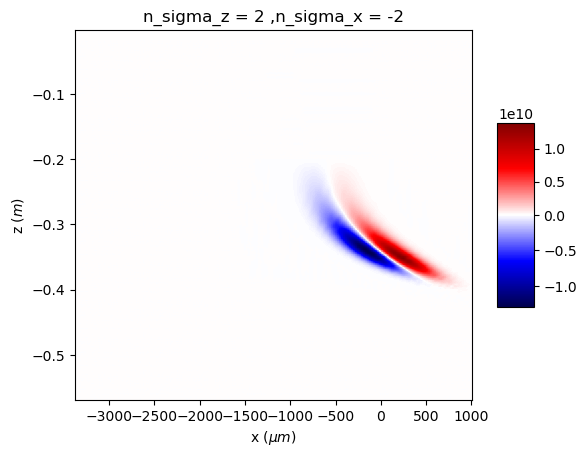

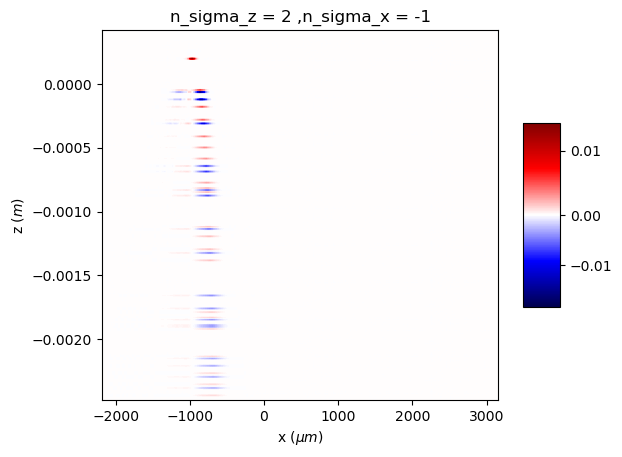

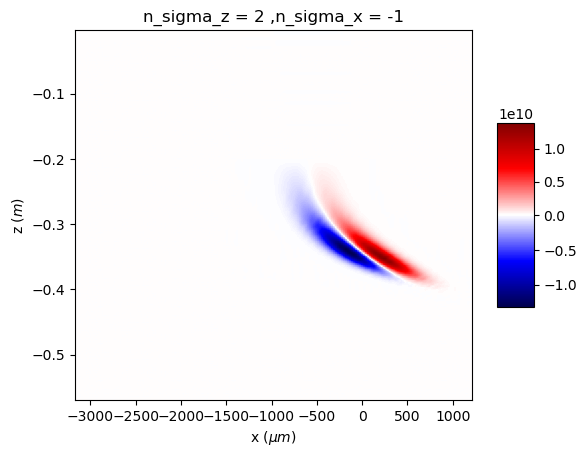

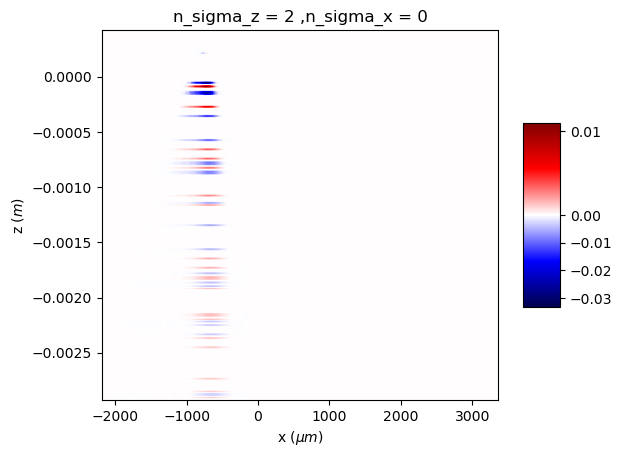

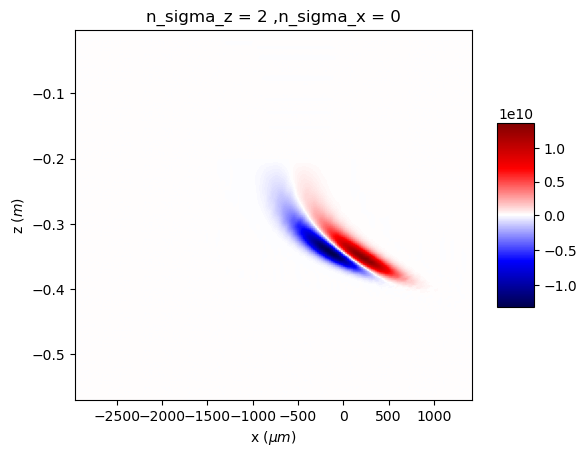

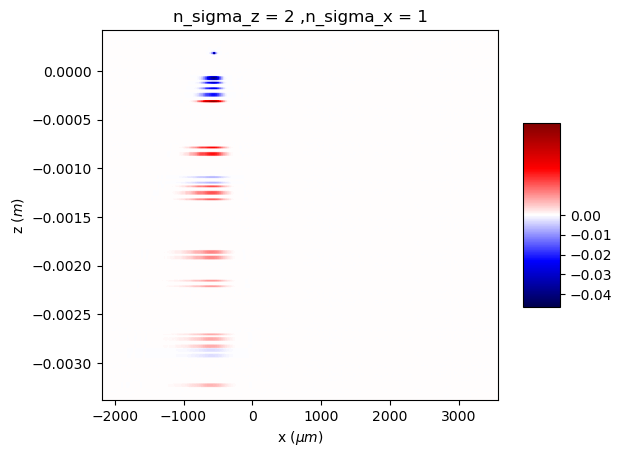

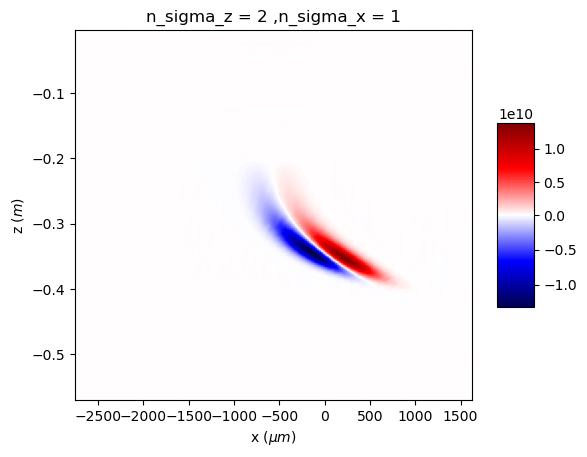

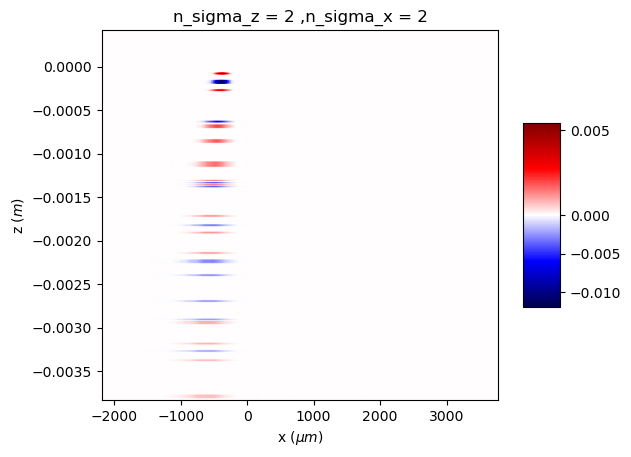

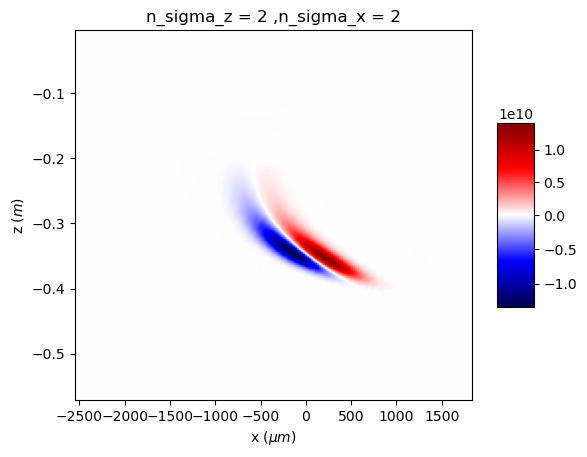

In [34]:
t = DtestCSR.beam.position
print(t)
for k in [-2,-1,0, 1,2]:
    s  = t + k*DtestCSR.beam.sigma_z
    for q in [-2, -1, 0, 1,2]:
        x = (s-t)*DtestCSR.beam.slope[0] + q*DtestCSR.beam._sigma_x_transform
        title = "n_sigma_z = " +  str(k) +  " ,n_sigma_x = " + str(q)
        
        tan_theta = DtestCSR.beam._slope[0]
        x0 = DtestCSR.beam.mean_x
        if np.abs(tan_theta) <= 1:   #if theta <45 degre, the chirp band can be ignored. theta is the angle in z-x plane
            s1 = s - 3*DtestCSR.beam._sigma_z
            s2 = s + 3*DtestCSR.beam._sigma_z
            xmin = x - 3*DtestCSR.beam._sigma_x
            xmax = x + 3*DtestCSR.beam._sigma_x
        else:
            if tan_theta > 0:
                tan_alpha = -2*tan_theta/(1-tan_theta**2) # alpha = pi - 2 theta, tan_alpha > 0
                d = (5*DtestCSR.beam._sigma_x + x0 - x)/tan_alpha
                s1 = np.max((0,s - d))
                s2 = s + 3*DtestCSR.beam._sigma_z
                xmax = x0 + 5*DtestCSR.beam._sigma_x
                xmin = x - 20*DtestCSR.beam._sigma_x_transform
        
            else:
                tan_alpha = 2*tan_theta/(1-tan_theta**2)
                d = -(x0 - x - 5*DtestCSR.beam._sigma_x)/tan_alpha
                s1 = np.max((0,s - d))
                s2 = s + 3*DtestCSR.beam._sigma_z
                xmin = x0 - 5*DtestCSR.beam._sigma_x
                xmax = x + 20*DtestCSR.beam._sigma_x_transform
        sp = np.linspace(s1, s2, 200)
        xp = np.linspace(xmin, xmax, 200)
        [xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

       
        CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
        ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T, title = title)

        #------------------------------
        s3 = np.max((0, s1 - 2*DtestCSR.formation_length))
        sp = np.linspace(s3, s1, 200)
        if np.abs(tan_theta) <= 1:
            xmin = x - 20*DtestCSR.beam._sigma_x
            xmax = x + 20*DtestCSR.beam._sigma_x
        
        else:
            xmin = x - 5*DtestCSR.beam._sigma_x
            xmax = x + 5*DtestCSR.beam._sigma_x
       
        xp = np.linspace(xmin, xmax, 200)
        [xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')


        CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
        ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T, title = title)
        

In [5]:
?plot_2D_contour

Signature: plot_2D_contour(x, y, z)
Docstring: <no docstring>
File:      c:\users\jingyi\appdata\local\temp\ipykernel_18024\4262750164.py
Type:      function